toml filename=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/projects/rtSynth_rt/conf/sub001.ses1.toml


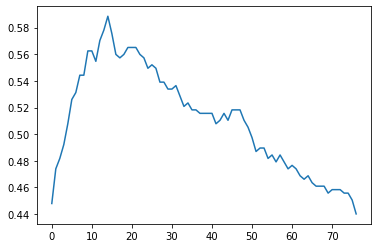

In [35]:
N=78

import os
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/')
import argparse
import numpy as np
import nibabel as nib
import scipy.io as sio
import subprocess
from scipy.stats import zscore
from nibabel.nicom import dicomreaders
import pydicom as dicom  # type: ignore
import time
from glob import glob
import shutil
from nilearn.image import new_img_like
import joblib
import rtCommon.utils as utils
from rtCommon.utils import loadConfigFile
import pickle5 as pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
# from rtCommon.fileClient import FileInterface
# import rtCommon.projectUtils as projUtils
# from rtCommon.imageHandling import readRetryDicomFromFileInterface, getDicomFileName, convertDicomImgToNifti


argParser = argparse.ArgumentParser()
argParser.add_argument('--config', '-c', default='sub001.ses1.toml', type=str, help='experiment file (.json or .toml)')
argParser.add_argument('--skipPre', '-s', default=0, type=int, help='skip preprocess or not')
argParser.add_argument('--skipGreedy', '-g', default=0, type=int, help='skip greedy or not')
args = argParser.parse_args("")
from rtCommon.cfg_loading import mkdir,cfg_loading
# config="sub001.ses2.toml"
cfg = cfg_loading(args.config)


# when every mask has run, find the best mask and save as the chosenMask
roiloc="schaefer2018"
dataSource="realtime"
subjects=[cfg.subjectName]
N=N
GreedyBestAcc=np.zeros((len(subjects),N+1))
GreedyBestAcc[GreedyBestAcc==0]=None
for ii,subject in enumerate(subjects):
#     try:
#         GreedyBestAcc[ii,40]=np.load("./{}/{}/output/top{}.npy".format(roiloc, subject, N))
#     except:
#         pass
    for len_topN_1 in range(N-1,0,-1):
        try:
            # print(f"./tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
            di = load_obj(f"{cfg.projectDir}tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
            GreedyBestAcc[ii,len_topN_1-1] = di['bestAcc']
        except:
            pass
GreedyBestAcc=GreedyBestAcc.T
import matplotlib.pyplot as plt
plt.plot(GreedyBestAcc)

In [36]:
import pandas as pd
ThresholdLog = pd.DataFrame(columns=['sub', 'session', 'run', 'threshold', 'successful trials', 'perfect trials'])

# ThresholdLog = ThresholdLog.append({
#     'sub':sub, 
#     'session':session, 
#     'run':run, 
#     'threshold':threshold, 
#     'successful trials':successful_trials, 
#     'perfect trials':perfect_trials},
#     ignore_index=True)


ThresholdLog = ThresholdLog.append({
    'sub':'sub001', 
    'session':1, 
    'run':1, 
    'threshold':0.6},
    ignore_index=True)
ThresholdLog = ThresholdLog.append({
    'sub':'sub001', 
    'session':1, 
    'run':1, 
    'threshold':0.5},
    ignore_index=True)
ThresholdLog['threshold'].iloc[-1]

0.5

In [38]:
ThresholdLog.to_csv("test")

In [40]:
a=pd.read_csv("test")
a['threshold'].iloc[-1]

0.5

In [54]:
# ThresholdLog["successful trials",-1]=1
ThresholdLog["sub"].loc[4]="sub001"
ThresholdLog = ThresholdLog.append({
    'sub':'sub001', 
    'session':1, 
    'run':1, 
    'threshold':0.6},
    ignore_index=True)

ThresholdLog

,sub,session,run,threshold,successful trials,perfect trials,"(successful trials, 0)","(sub, 2)","(sub, 3)"
0,sub001,1,1,0.6,1.0,NaN,1.0,sub001,sub001
1,sub001,1,1,0.5,NaN,NaN,1.0,sub001,sub001
2,sub001,1,1,0.6,NaN,NaN,NaN,NaN,NaN


In [56]:
list(ThresholdLog['threshold'])

[0.6, 0.5, 0.6]

In [70]:
a=[1,2,3]
a[0]==2 and a[4]==0

False

In [71]:
a[-3]

1